<a href="https://colab.research.google.com/github/yugpatelyp2/uk_traffic_and_accidents/blob/main/uk_Region_traffic_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pandas import DataFrame, read_csv

import csv
import warnings
warnings.filterwarnings('ignore')
accidents=pd.read_csv('Accidents0515.csv')
casualties=pd.read_csv('Casualties0515.csv' , error_bad_lines=False,warn_bad_lines=False)
vehicles=pd.read_csv('Vehicles0515.csv', error_bad_lines=False,warn_bad_lines=False)
region_traffic=pd.read_csv('region_traffic.csv', error_bad_lines=False,warn_bad_lines=False)

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])
    
for col in vehicles.columns:
    vehicles = (vehicles[vehicles[col]!=-1]) 
for col in region_traffic.columns:
    region_traffic = (region_traffic[region_traffic[col]!=-1])
    

# 1. Sum of the accidents

In [121]:
sum=len(accidents)
print("Number of accidents:", sum)

Number of accidents: 569678


In [28]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1.0,3.0,1.0,1.0,05/01/2005,4.0,17:36,12.0,E09000020,4.0,450.0,3.0,30.0,6.0,2.0,5.0,0.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1.0,3.0,2.0,1.0,13/01/2005,5.0,20:40,12.0,E09000020,5.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1.0,3.0,2.0,2.0,15/01/2005,7.0,22:43,12.0,E09000020,3.0,3212.0,6.0,30.0,6.0,2.0,4.0,304.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002900
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1.0,3.0,2.0,5.0,15/01/2005,7.0,16:00,12.0,E09000020,4.0,450.0,6.0,30.0,3.0,4.0,5.0,0.0,0.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875
10,200501BS00012,526240.0,178900.0,-0.182872,51.494902,1.0,3.0,1.0,1.0,16/01/2005,1.0,00:42,12.0,E09000020,3.0,4.0,6.0,30.0,6.0,2.0,4.0,325.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002835


In [29]:
accidents.shape

(569678, 32)

In [30]:
al=accidents['Longitude'].value_counts()
at=accidents['Latitude'].value_counts()
location=[al,at]
print(location)


[-0.977611    58
-1.871043    50
-0.816789    39
-1.234393    39
-1.190861    36
             ..
-3.170898     1
-2.288771     1
-0.199241     1
-2.974809     1
 0.402290     1
Name: Longitude, Length: 399504, dtype: int64, 52.458798    64
52.949719    58
52.989857    39
53.083165    39
54.968440    37
             ..
50.858309     1
51.382514     1
50.825042     1
51.316365     1
51.481155     1
Name: Latitude, Length: 384027, dtype: int64]


In [124]:
years = accidents.loc[:,'Date'].groupby(accidents['Date'].map(lambda x: x[6:10])).count()
years=pd.DataFrame(data=years)
years['Year']=years.index
years.columns=['Accidents', 'Year']

years.plot(kind='bar',color="pink", alpha=0.7, title='Number of accidents in every year', figsize=(12,5), legend=False, rot=0)
plt.ylabel('Number od accidents' , fontsize = 18)
plt.xlabel('Years', fontsize = 18)

TypeError: ignored

Text(0, 0.5, 'Number od accidents')

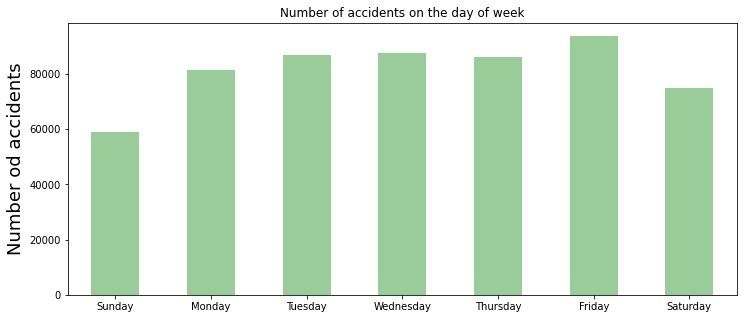

In [37]:
days = accidents.loc[:,'Day_of_Week'].groupby(accidents['Day_of_Week']).count()
days=pd.DataFrame(data=days)
days['days']=days.index
days.columns=['Accidents', 'Days']
days['Days']=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
days.index=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
days.plot(kind='bar',color='green', alpha=0.4, title='Number of accidents on the day of week', figsize=(12,5), legend=False, width=0.5, rot=0)
plt.ylabel('Number od accidents' , fontsize = 18)


# 3. Percentage of accidents in speed zone

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b2ece7b90>],
      dtype=object)

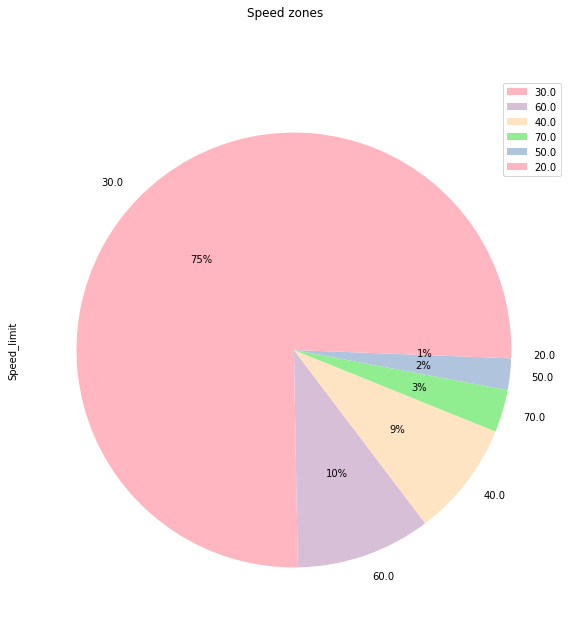

In [38]:
speed1 = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])] 
speed = speed1.Speed_limit.value_counts()
speed.plot(kind='pie', subplots=True, figsize=(10,10), colors=['lightpink', 'thistle','bisque', 'lightgreen','lightsteelblue'],  autopct='%1.0f%%', title="Speed zones",legend=True)

Text(0.5, 0, 'Accidents')

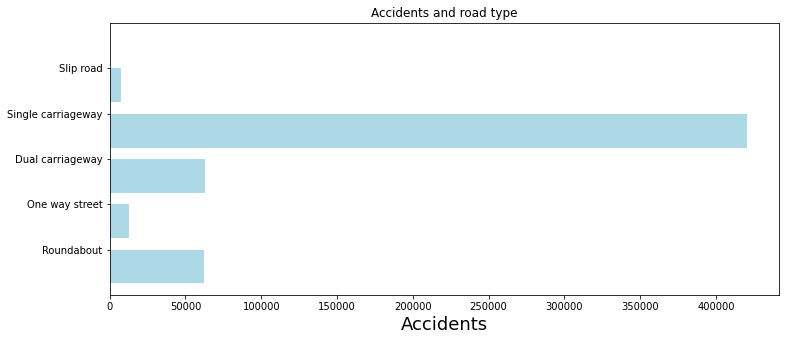

In [39]:
road=accidents[accidents.Road_Type!=9] # deleting rows:'not known'
road1 = road.loc[:,'Road_Type'].groupby(road['Road_Type']).count()

road=pd.DataFrame(data=road1)
road['road']=road.index
road.columns=['Accidents', 'road']
road.index=['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road']
road.plot(kind='barh',  title='Accidents and road type', figsize=(12,5), legend=False, color='lightblue', alpha=1, width=1.5)
plt.xlabel('Accidents' , fontsize = 18)


# 4. Male/Female

4.1 The Driver

   driver  number
0  Female  341900
1    Male  676394


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b2ecab0d0>],
      dtype=object)

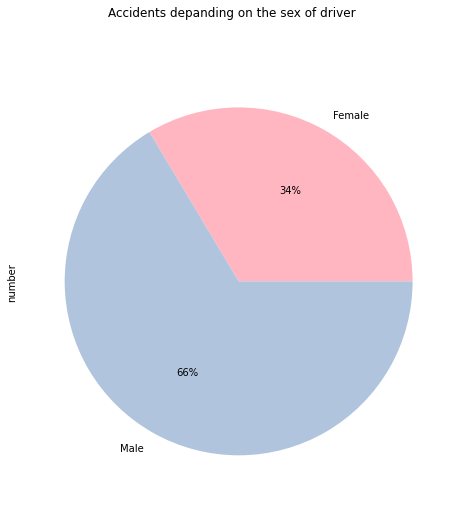

In [40]:
sex_d=vehicles['Sex_of_Driver']
kobiety=0
for x in sex_d:
    if x==2:
        kobiety=kobiety+1
mez=0
for x in sex_d:
    if x==1:
        mez=mez+1

sex_table = pd.DataFrame({'driver': ['Female','Male'],'number':[kobiety,mez]})
print(sex_table)

sex_table.set_index('driver', inplace=True)
sex_table['number'].plot(kind='pie', subplots=True, figsize=(8, 8), colors=['lightpink', 'lightsteelblue'], autopct='%1.0f%%', title="Accidents depanding on the sex of driver")

4.2 Casualties

   driver  number
0  Female       0
1    Male       0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b2ecc4410>],
      dtype=object)

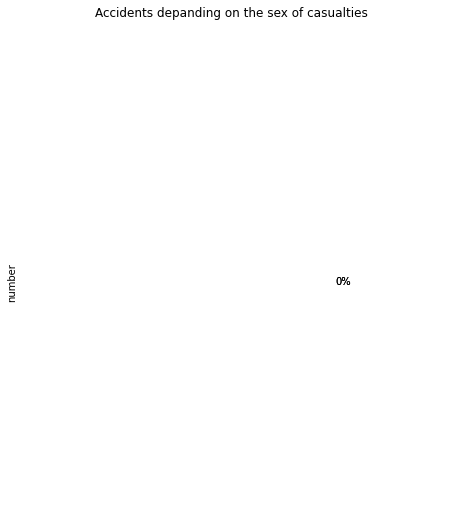

In [41]:
sex_c=casualties['Sex_of_Casualty']
kobiety=0
for x in sex_c:
    if x==2:
        kobiety=kobiety+1
mez=0
for x in sex_c:
    if x==1:
        mez=mez+1

sex_table = pd.DataFrame([{'driver': 'Female','number':kobiety},
                {'driver': 'Male','number':mez}])
print(sex_table)

sex_table.set_index('driver', inplace=True)
sex_table['number'].plot(kind='pie', subplots=True, figsize=(8, 8), colors=['lightpink', 'lightsteelblue'], autopct='%1.0f%%', title="Accidents depanding on the sex of casualties")


In [43]:
poszk1 = casualties.loc[:, 'Casualty_Class'].groupby(casualties['Casualty_Class']).count()
poszkod=pd.DataFrame(data=poszk1)
poszkod['poszkod']=poszkod.index
poszkod.columns=['Accidents','type']
poszkod.index=['Driver','Passanger','Pedestrian']
poszkod.plot(kind='bar', title='Casualty_Class', figsize=(9,5), legend=0, color='yellow', alpha=0.3, width=0.9, rot=0, position=0.25)
plt.ylabel('Number Of Casualties', fontsize=18)

ValueError: ignored

# Who was the casualty?

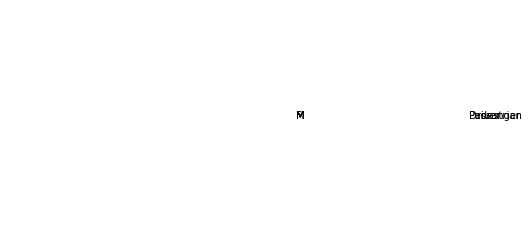

In [44]:
plec=casualties.loc[:,['Accident_Index','Sex_of_Casualty']]
poszkodowani=casualties.loc[:,['Accident_Index','Casualty_Class']]
tabelka1=pd.merge(poszkodowani, plec, on='Accident_Index')

def wybrane_nr(dane, number1,number2, what1, what2):
    table=dane[dane[what1]==number1]
    table=table[table[what2]==number2]    
    return (table.count())[what1]

m1=wybrane_nr(tabelka1,1,1,'Casualty_Class','Sex_of_Casualty')
m2=wybrane_nr(tabelka1,2,1,'Casualty_Class','Sex_of_Casualty')
m3=wybrane_nr(tabelka1,3,1,'Casualty_Class','Sex_of_Casualty')
k1=wybrane_nr(tabelka1,1,2,'Casualty_Class','Sex_of_Casualty')
k2=wybrane_nr(tabelka1,2,2,'Casualty_Class','Sex_of_Casualty')
k3=wybrane_nr(tabelka1,3,2,'Casualty_Class','Sex_of_Casualty')

group_names=['Driver', 'Passanger', 'Pedestrian']
group_size=[m1+k1,m2+k2,m3+k3]
subgroup_names=['M', 'F','M', 'F','M', 'F']
subgroup_size=[m1,k1,m2,k2,m3,k3]
 

a, b, c=[plt.cm.OrRd, plt.cm.PuRd, plt.cm.PuBu]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2, labels=group_names, colors=[a(0.6), b(0.5), c(0.6)])
plt.setp( mypie,width=0.7, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, labels=subgroup_names, labeldistance=0.7,colors=[a(0.4), a(0.3), b(0.4), b(0.3), c(0.5), c(0.4)])
plt.setp( mypie2, width=0.5, edgecolor='white') 
plt.show()

# 5. Age

Text(0.5, 0, 'Age of drivers')

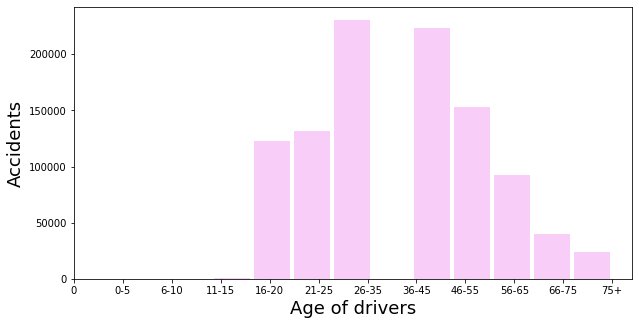

In [45]:
band = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']
vehicles.Age_Band_of_Driver.hist(bins=11, color='violet', alpha=0.4, rwidth=0.9, figsize=(10,5))
plt.grid(False)
y = np.arange(len(band))
plt.xticks(y , band)

plt.ylabel('Accidents' , fontsize = 18)
plt.xlabel('Age of drivers', fontsize = 18)

# Accident severity

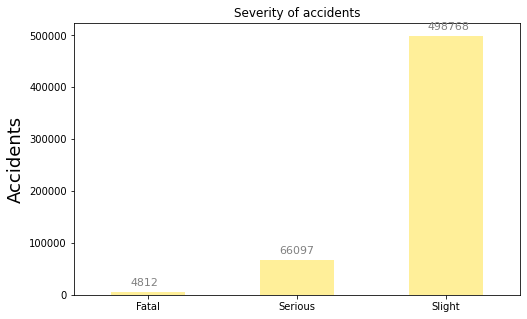

In [46]:
accident_sev=pd.read_csv('Accidents0515.csv')

waga = accidents.loc[:,'Accident_Severity'].groupby(accidents['Accident_Severity']).count()

waga=pd.DataFrame(data=waga)
waga['Accident']=waga.index

waga.columns=['Accidents', 'Accident_Severity']
waga['Accident_Severity']=['Fatal','Serious','Slight']
waga.index=['Fatal','Serious','Slight']

w=waga.plot(kind='bar',color='gold',alpha=0.4,  title='Severity of accidents', figsize=(8,5), legend=False, width=0.5, rot=0)
plt.ylabel('Accidents' , fontsize = 18)
plt.xlabel('')


for i in w.patches:
    
    w.text(i.get_x()+.13, i.get_height()+12000, \
            str(round(i.get_height())), fontsize=11, color='grey', rotation=0)

# Co-relation between accidents severity and sex

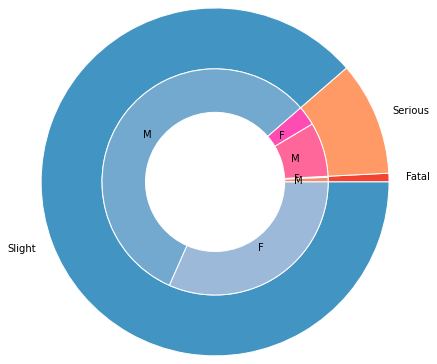

In [47]:
plec=vehicles.loc[:,['Accident_Index','Sex_of_Driver']]
powaga=accidents.loc[:,['Accident_Index','Accident_Severity']]
tabelka1=pd.merge(powaga, plec, on='Accident_Index')

m1=wybrane_nr(tabelka1,1,1,'Accident_Severity','Sex_of_Driver')
m2=wybrane_nr(tabelka1,2,1,'Accident_Severity','Sex_of_Driver')
m3=wybrane_nr(tabelka1,3,1,'Accident_Severity','Sex_of_Driver')
k1=wybrane_nr(tabelka1,1,2,'Accident_Severity','Sex_of_Driver')
k2=wybrane_nr(tabelka1,2,2,'Accident_Severity','Sex_of_Driver')
k3=wybrane_nr(tabelka1,3,2,'Accident_Severity','Sex_of_Driver')

group_names=['Fatal', 'Serious', 'Slight']
group_size=[m1+k1,m2+k2,m3+k3]
subgroup_names=['M', 'F','M', 'F','M', 'F']
subgroup_size=[m1,k1,m2,k2,m3,k3]
 

a, b, c=[plt.cm.Reds, plt.cm.spring, plt.cm.PuBu]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.7, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.4), a(0.3), b(0.4), b(0.3), c(0.5), c(0.4)])
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0) 
plt.show()


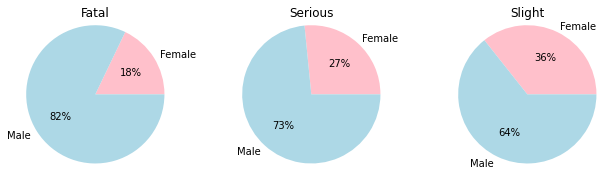

In [48]:
labels = 'Female', 'Male'
fracs1 = [k1,m1]
fracs2 = [k2,m2]
fracs3 = [k3,m3]


fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(fracs1, labels=labels, radius = 1.2, colors=['pink','lightblue'],autopct='%1.0f%%')
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(fracs2, labels=labels, radius = 1.2,colors=['pink','lightblue'],autopct='%1.0f%%')
ax3 = fig.add_axes([.0, .0, 2.5, 0.5], aspect=1)
ax3.pie(fracs3, labels=labels, radius = 1.2,colors=['pink','lightblue'],autopct='%1.0f%%')
ax1.set_title('Fatal')
ax2.set_title('Serious')
ax3.set_title('Slight')

plt.show()



In [49]:
region_traffic.head()

,year,region_id,region_name,road_category_id,road_category_name,road_category_description,total_link_length_km,total_link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,2019,1,South West,4,PA,Class A Principal road,4253.7,2643.13,5.435658e+07,1.061510e+08,8.525295e+09,6.718390e+07,1.601047e+09,3.836536e+08,1.068333e+10
1,2019,5,North West,4,PA,Class A Principal road,3793.0,2356.86,6.273163e+07,7.224395e+07,9.158519e+09,9.010205e+07,1.452720e+09,3.944172e+08,1.116800e+10
2,2019,3,Scotland,3,TA,Class A Trunk road,2952.5,1834.60,4.618189e+06,5.055147e+07,5.002907e+09,5.497848e+07,1.090808e+09,5.340358e+08,6.733280e+09
3,2019,10,West Midlands,2,PM,M or Class A Principal Motorway,3.8,2.36,0.000000e+00,2.447062e+05,6.610085e+07,5.540045e+05,9.836292e+06,3.804494e+06,8.054034e+07
4,2019,6,London,3,TA,Class A Trunk road,1.6,0.99,1.722875e+04,1.087472e+05,9.981850e+06,5.335774e+04,1.933932e+06,1.051267e+06,1.312915e+07


In [50]:
region_traffic.shape

(1645, 15)

In [51]:
print('road_category_description')
region_traffic['road_category_description'].value_counts()


road_category_description


Class C and Unclassified road      297
Class B road                       297
M or Class A Trunk Motorway        297
Class A Principal road             297
Class A Trunk road                 284
M or Class A Principal Motorway    173
Name: road_category_description, dtype: int64

In [52]:
print('region_name')
region_traffic['region_name'].value_counts()

region_name


South East                  162
North East                  162
Yorkshire and The Humber    162
West Midlands               162
North West                  162
South West                  143
East of England             141
East Midlands               141
Wales                       141
Scotland                    141
London                      128
Name: region_name, dtype: int64

In [53]:
print('region_id')
region_traffic['region_id'].value_counts()

region_id


11    162
10    162
9     162
8     162
5     162
1     143
7     141
4     141
3     141
2     141
6     128
Name: region_id, dtype: int64

In [54]:
#Total vehicle miles (billions)
region_traffic.groupby('region_name')['all_hgvs'].sum()/1000000000

region_name
East Midlands               51.372144
East of England             54.688936
London                      17.527338
North East                  12.994773
North West                  54.603954
Scotland                    41.791914
South East                  64.995477
South West                  38.871491
Wales                       20.355423
West Midlands               50.973384
Yorkshire and The Humber    48.272793
Name: all_hgvs, dtype: float64

In [55]:
region_traffic.groupby('region_name')['all_motor_vehicles'].sum()/1000000000

region_name
East Midlands                676.625952
East of England              918.158533
London                       536.848995
North East                   314.583216
North West                   922.975804
Scotland                     707.429347
South East                  1402.851963
South West                   805.598090
Wales                        451.146210
West Midlands                803.665867
Yorkshire and The Humber     694.995567
Name: all_motor_vehicles, dtype: float64

In [56]:
region_traffic.groupby('road_category_description')['all_motor_vehicles'].sum()/1000000000

road_category_description
Class A Principal road             2509.799109
Class A Trunk road                 1160.075220
Class B road                        638.369084
Class C and Unclassified road      2335.849341
M or Class A Principal Motorway      16.262496
M or Class A Trunk Motorway        1574.524294
Name: all_motor_vehicles, dtype: float64

No handles with labels found to put in legend.


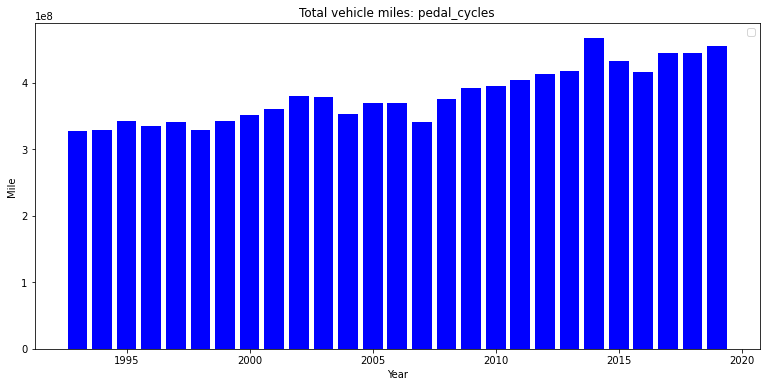

In [57]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
plt.bar( 'year', 'pedal_cycles', data=region_traffic, color='blue')
# show legend
plt.legend()
plt.title('Total vehicle miles: pedal_cycles')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

No handles with labels found to put in legend.


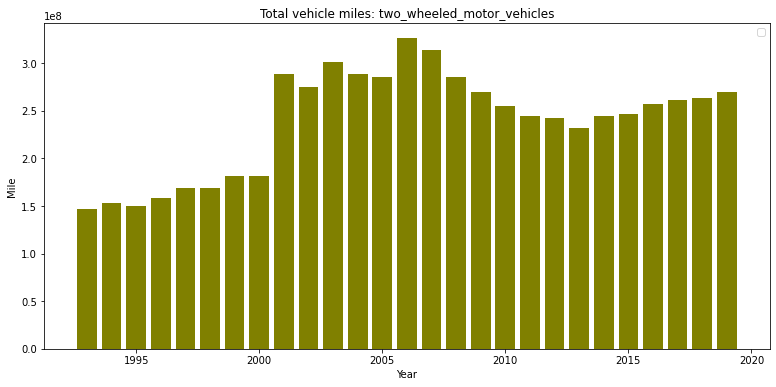

In [58]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
plt.bar( 'year', 'two_wheeled_motor_vehicles', data=region_traffic, color='olive')
#plt.plot( 'year', 'cars_and_taxis', data=region_traffic, color='purple')
#plt.plot( 'year', 'buses_and_coaches', data=region_traffic, color='green')
#plt.plot( 'year', 'lgvs', data=region_traffic, color='red')
# show legend
plt.legend()
plt.title('Total vehicle miles: two_wheeled_motor_vehicles')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

No handles with labels found to put in legend.


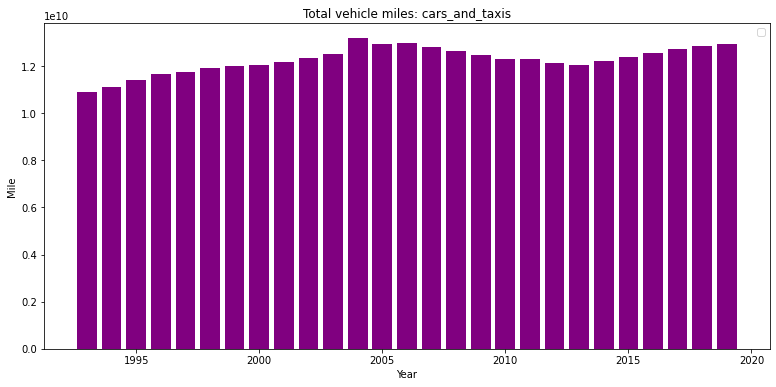

In [59]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
#plt.bar( 'year', 'two_wheeled_motor_vehicles', data=region_traffic, color='olive')
plt.bar( 'year', 'cars_and_taxis', data=region_traffic, color='purple')
#plt.plot( 'year', 'buses_and_coaches', data=region_traffic, color='green')
#plt.plot( 'year', 'lgvs', data=region_traffic, color='red')
# show legend
plt.legend()
plt.title('Total vehicle miles: cars_and_taxis')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

No handles with labels found to put in legend.


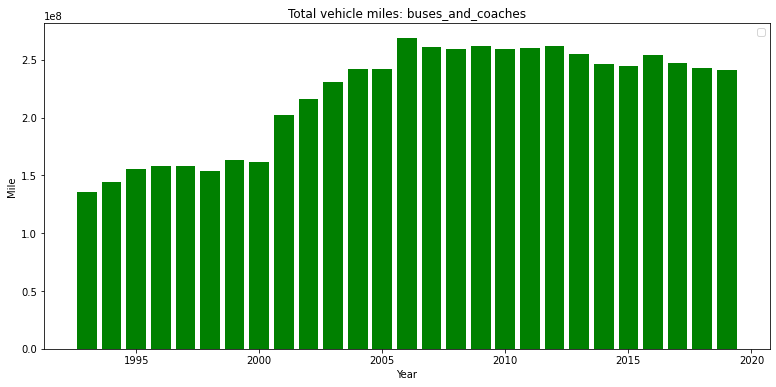

In [60]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
#plt.bar( 'year', 'two_wheeled_motor_vehicles', data=region_traffic, color='olive')
#plt.bar( 'year', 'cars_and_taxis', data=region_traffic, color='purple')
plt.bar( 'year', 'buses_and_coaches', data=region_traffic, color='green')
#plt.plot( 'year', 'lgvs', data=region_traffic, color='red')
# show legend
plt.legend()
plt.title('Total vehicle miles: buses_and_coaches')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

No handles with labels found to put in legend.


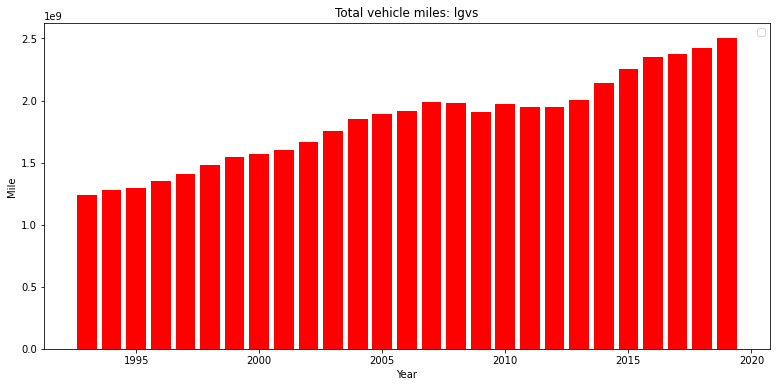

In [61]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
#plt.bar( 'year', 'two_wheeled_motor_vehicles', data=region_traffic, color='olive')
#plt.bar( 'year', 'cars_and_taxis', data=region_traffic, color='purple')
#plt.bar( 'year', 'buses_and_coaches', data=region_traffic, color='green')
plt.bar( 'year', 'lgvs', data=region_traffic, color='red')
# show legend
plt.legend()
plt.title('Total vehicle miles: lgvs')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

In [62]:
import seaborn as sns

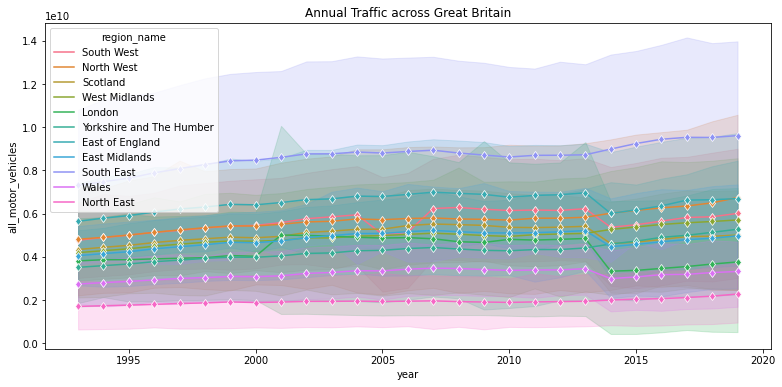

In [63]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='all_motor_vehicles', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain')
plt.show()

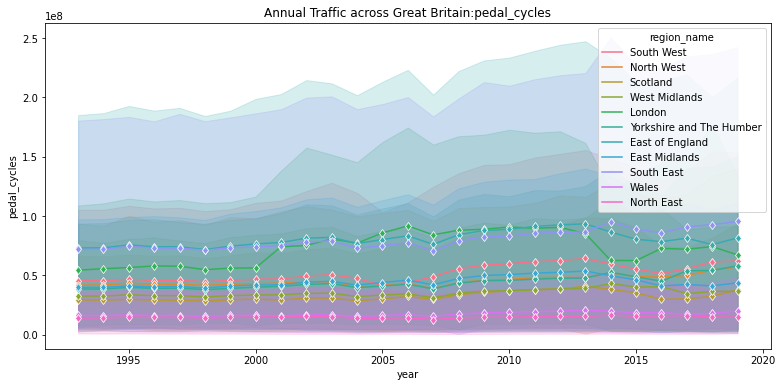

In [64]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='pedal_cycles', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain:pedal_cycles')
plt.show()

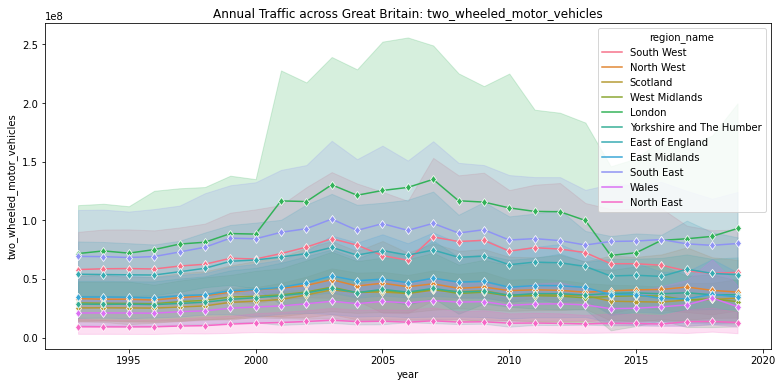

In [65]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='two_wheeled_motor_vehicles', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain: two_wheeled_motor_vehicles')
plt.show()

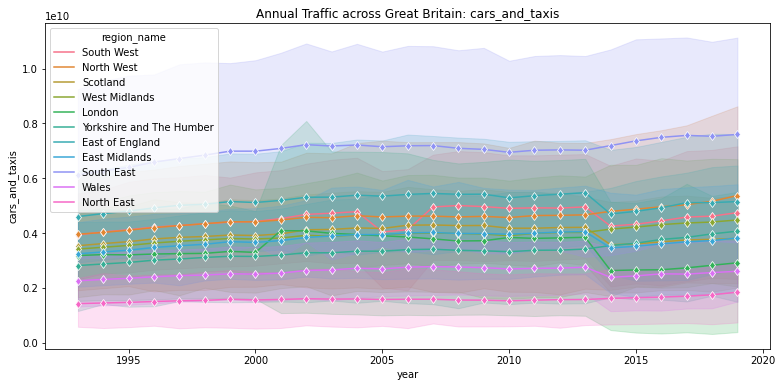

In [66]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='cars_and_taxis', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain: cars_and_taxis')
plt.show()

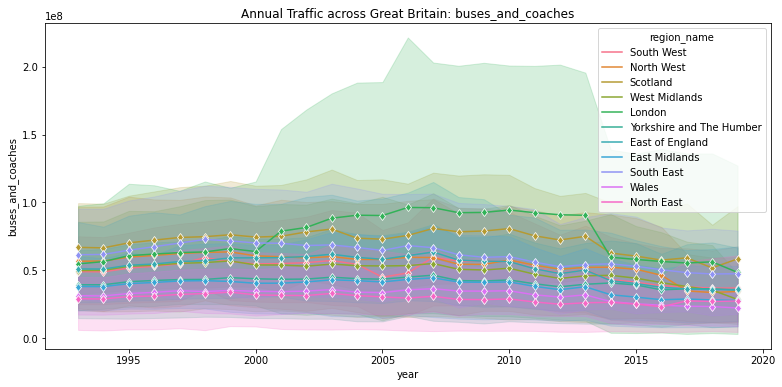

In [67]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='buses_and_coaches', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain: buses_and_coaches')
plt.show()

In [68]:
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE

0.4.3


In [104]:
df_all = pd.concat([accidents])

In [105]:
df_all

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1.0,3.0,1.0,1.0,05/01/2005,4.0,17:36,12.0,E09000020,4.0,450.0,3.0,30.0,6.0,2.0,5.0,0.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1.0,3.0,2.0,1.0,13/01/2005,5.0,20:40,12.0,E09000020,5.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1.0,3.0,2.0,2.0,15/01/2005,7.0,22:43,12.0,E09000020,3.0,3212.0,6.0,30.0,6.0,2.0,4.0,304.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002900
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1.0,3.0,2.0,5.0,15/01/2005,7.0,16:00,12.0,E09000020,4.0,450.0,6.0,30.0,3.0,4.0,5.0,0.0,0.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875
10,200501BS00012,526240.0,178900.0,-0.182872,51.494902,1.0,3.0,1.0,1.0,16/01/2005,1.0,00:42,12.0,E09000020,3.0,4.0,6.0,30.0,6.0,2.0,4.0,325.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977847,2010231090363,425490.0,244360.0,-1.629325,52.096960,23.0,3.0,1.0,1.0,05/04/2010,2.0,14:50,293.0,E10000031,3.0,429.0,6.0,60.0,1.0,4.0,3.0,3400.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031246
977848,2010231090368,434410.0,260330.0,-1.497501,52.240053,23.0,1.0,2.0,1.0,08/04/2010,5.0,13:20,293.0,E10000031,4.0,4455.0,6.0,60.0,6.0,4.0,5.0,43.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031199
977850,2010231090370,409140.0,258290.0,-1.867629,52.222708,23.0,3.0,1.0,1.0,09/04/2010,6.0,00:57,293.0,E10000031,6.0,5362.0,6.0,30.0,6.0,4.0,6.0,5361.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031185
977852,2010231090375,425880.0,245190.0,-1.623569,52.104404,23.0,2.0,3.0,2.0,10/04/2010,7.0,11:22,293.0,E10000031,3.0,429.0,6.0,30.0,3.0,4.0,5.0,49.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031246


In [107]:
print('Time')
df_all['Time'].value_counts()[0:10]

Time


17:00    5707
17:30    5523
16:00    5249
18:00    5241
15:30    5130
16:30    5041
08:30    4579
15:00    4467
13:00    4345
18:30    4262
Name: Time, dtype: int64

In [108]:
df_all.shape

(569678, 32)

In [109]:
df_all.isnull().sum()

Accident_Index                                     0
Location_Easting_OSGR                             37
Location_Northing_OSGR                            37
Longitude                                         38
Latitude                                          38
Police_Force                                       1
Accident_Severity                                  1
Number_of_Vehicles                                 1
Number_of_Casualties                               1
Date                                               1
Day_of_Week                                        1
Time                                              43
Local_Authority_(District)                         1
Local_Authority_(Highway)                          1
1st_Road_Class                                     1
1st_Road_Number                                    1
Road_Type                                          1
Speed_limit                                        1
Junction_Detail                               

In [110]:
df_all = df_all[pd.notnull(df_all['Longitude'])]
df_all = df_all[pd.notnull(df_all['Latitude'])]

In [111]:
df_all.isnull().sum()[0:40]

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                              42
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [112]:
df_all.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [120]:
df_all = df_all.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties','Day_of_Week',
       'Local_Authority_(District)','1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',],axis=1)

KeyError: ignored

In [115]:
df_all

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1,-0.211708,51.520075,1.0,3.0,1.0,1.0,05/01/2005,4.0,17:36,12.0,E09000020,4.0,450.0,3.0,30.0,6.0,2.0,5.0,0.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909
6,-0.211277,51.512695,1.0,3.0,2.0,1.0,13/01/2005,5.0,20:40,12.0,E09000020,5.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875
8,-0.167342,51.483420,1.0,3.0,2.0,2.0,15/01/2005,7.0,22:43,12.0,E09000020,3.0,3212.0,6.0,30.0,6.0,2.0,4.0,304.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002900
9,-0.206531,51.512443,1.0,3.0,2.0,5.0,15/01/2005,7.0,16:00,12.0,E09000020,4.0,450.0,6.0,30.0,3.0,4.0,5.0,0.0,0.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875
10,-0.182872,51.494902,1.0,3.0,1.0,1.0,16/01/2005,1.0,00:42,12.0,E09000020,3.0,4.0,6.0,30.0,6.0,2.0,4.0,325.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977846,-1.899741,52.264725,23.0,3.0,2.0,1.0,05/04/2010,2.0,13:45,293.0,E10000031,3.0,448.0,6.0,40.0,6.0,4.0,5.0,38.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031242
977847,-1.629325,52.096960,23.0,3.0,1.0,1.0,05/04/2010,2.0,14:50,293.0,E10000031,3.0,429.0,6.0,60.0,1.0,4.0,3.0,3400.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031246
977848,-1.497501,52.240053,23.0,1.0,2.0,1.0,08/04/2010,5.0,13:20,293.0,E10000031,4.0,4455.0,6.0,60.0,6.0,4.0,5.0,43.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031199
977850,-1.867629,52.222708,23.0,3.0,1.0,1.0,09/04/2010,6.0,00:57,293.0,E10000031,6.0,5362.0,6.0,30.0,6.0,4.0,6.0,5361.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031185


In [116]:
place=pd.read_csv('place.csv')

In [ ]:
place.head()

In [117]:
df_all.isnull().sum()

Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                              42
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                                    0
Junction_Control                                   0
2nd_Road_Class                                     0
2nd_Road_Number                               

In [118]:
#df_all = df_all.apply(pd.to_numeric)
X = df_all.drop('Road_Type', axis=1) #Gets all the Feature columns

Y = df_all['Road_Type'] #Gets the Target Variable

X


,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1,-0.211708,51.520075,1.0,3.0,1.0,1.0,05/01/2005,4.0,17:36,12.0,E09000020,4.0,450.0,30.0,6.0,2.0,5.0,0.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909
6,-0.211277,51.512695,1.0,3.0,2.0,1.0,13/01/2005,5.0,20:40,12.0,E09000020,5.0,0.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875
8,-0.167342,51.483420,1.0,3.0,2.0,2.0,15/01/2005,7.0,22:43,12.0,E09000020,3.0,3212.0,30.0,6.0,2.0,4.0,304.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002900
9,-0.206531,51.512443,1.0,3.0,2.0,5.0,15/01/2005,7.0,16:00,12.0,E09000020,4.0,450.0,30.0,3.0,4.0,5.0,0.0,0.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002875
10,-0.182872,51.494902,1.0,3.0,1.0,1.0,16/01/2005,1.0,00:42,12.0,E09000020,3.0,4.0,30.0,6.0,2.0,4.0,325.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977846,-1.899741,52.264725,23.0,3.0,2.0,1.0,05/04/2010,2.0,13:45,293.0,E10000031,3.0,448.0,40.0,6.0,4.0,5.0,38.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031242
977847,-1.629325,52.096960,23.0,3.0,1.0,1.0,05/04/2010,2.0,14:50,293.0,E10000031,3.0,429.0,60.0,1.0,4.0,3.0,3400.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031246
977848,-1.497501,52.240053,23.0,1.0,2.0,1.0,08/04/2010,5.0,13:20,293.0,E10000031,4.0,4455.0,60.0,6.0,4.0,5.0,43.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031199
977850,-1.867629,52.222708,23.0,3.0,1.0,1.0,09/04/2010,6.0,00:57,293.0,E10000031,6.0,5362.0,30.0,6.0,4.0,6.0,5361.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,1.0,E01031185


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
#X = X.astype(str)
scaler.fit(X)
float(f)
scaled_X = scaler.transform(X)
scaled_X

ValueError: ignored